# Finding critical point $p_c$

In [11]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import scipy.stats as stats
import glob

In [12]:
sns.set()

In [5]:
root = '../data/site-percolation/critical/'
os.listdir(root)

['sq_lattice_site_percolation_periodic__critical_L300_.txt',
 'sq_lattice_site_percolation_periodic__critical_L100_.txt',
 'sq_lattice_site_percolation_periodic__critical_L400_.txt',
 'sq_lattice_site_percolation_periodic__critical_L200_.txt',
 'append-together.py',
 'sq_lattice_site_percolation_periodic__critical_L350_.txt',
 'sq_lattice_site_percolation_periodic__critical_L250_.txt',
 'sq_lattice_site_percolation_periodic__critical_L150_.txt']

In [6]:
signature = "sq_lattice_site_percolation_periodic"
files = glob.glob(root + signature + "*")

In [7]:
files

['../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L300_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L100_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L400_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L200_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L350_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L250_.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_L150_.txt']

In [8]:
data = []
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        L = int(head['length'])
    pcs = np.loadtxt(file, usecols=(0,))
    pc = np.mean(pcs)
    data.append([L, pc])
    pass

Text(0, 0.5, '$p_c$')

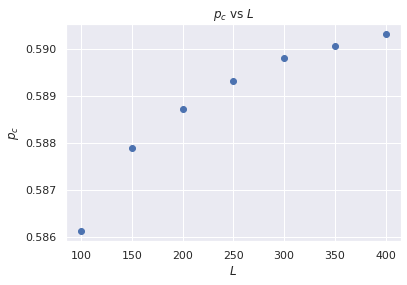

In [16]:
data = np.array(data)
plt.plot(data[:,0], data[:,1], 'o')
plt.title(r"$p_c$ vs $L$")
plt.xlabel(r"$L$")
plt.ylabel(r"$p_c$")


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(p(L)-p_c(\infty)) L ^{1/\nu} = const $

$(p(L)-p_c) \sim L ^{-1/\nu}$

$(p(L)-p_c(\infty)) \sim (L^{-1})^{1/\nu}$

In the limit $L\rightarrow \infty$, $p(L) = p(\infty)$

Text(0, 0.5, '$p_c$')

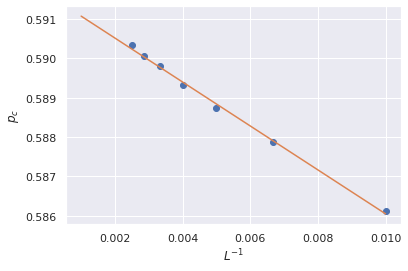

In [44]:
x = data[:,0]**(-1)
plt.plot(x, data[:,1], 'o')
regress = stats.linregress(x, data[:,1])
x = np.linspace(0.01, 0.001, 10)
y = x*regress[0] + regress[1]
plt.plot(x, y)

plt.xlabel(r"$L^{-1}$")
plt.ylabel(r"$p_c$")

In [45]:
print("intercept is the pc")
print(regress[1])

intercept is the pc
0.5916301140473662
